In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [3]:
# Convert Date column to datetime 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')

In [4]:
# Extract date features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [5]:
# Choose the state for prediction
state_name = 'Kerala'
X = df[['Month', 'Day', 'Day_of_Week']]
y = df[state_name]

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

In [7]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)

In [8]:
# Fit the model
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [9]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error for {state_name}: {mse}')
print(f'R-squared Score for {state_name}: {r2}')

Mean Squared Error for Kerala: 31.490823622698993
R-squared Score for Kerala: 0.21206409368612467


In [10]:
# Prediction for a future date
future_date = pd.DataFrame({'Month': [6], 'Day': [15], 'Day_of_Week': [5]})
future_prediction = best_model.predict(future_date)

print(f'Predicted Electricity Consumption for {state_name}: {future_prediction}')

Predicted Electricity Consumption for Kerala: [68.40691516]


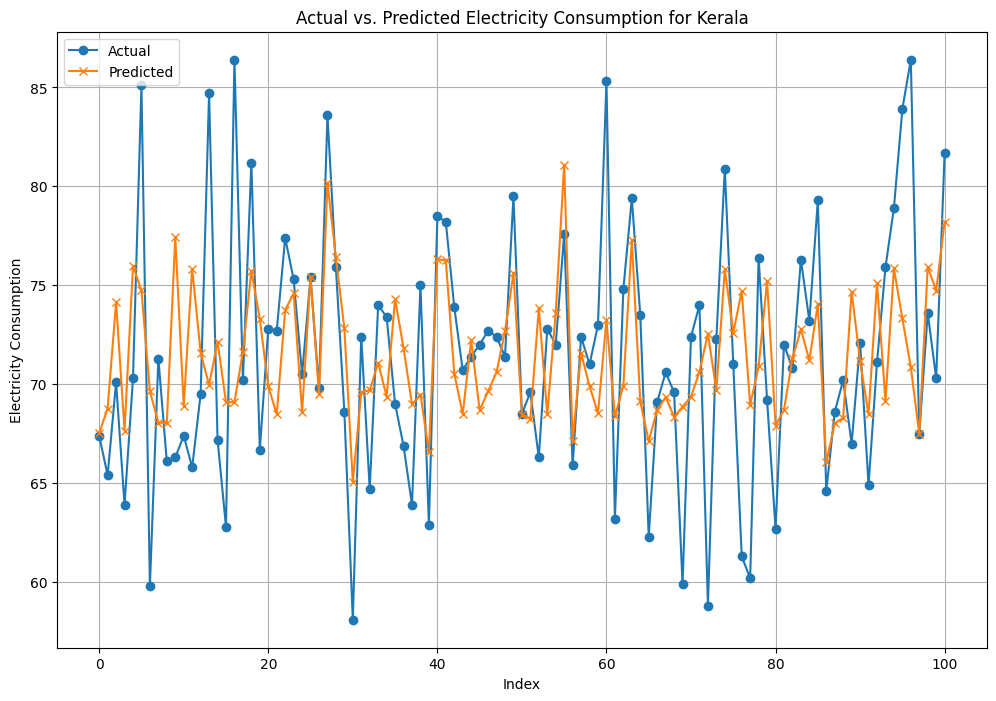

In [11]:
# Visualize actual vs. predicted 
plt.figure(figsize=(12, 8))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Electricity Consumption')
plt.title(f'Actual vs. Predicted Electricity Consumption for {state_name}')
plt.legend()
plt.grid(True)
plt.show()
